# Handwritten Digit Recognition using PCA & KNN
### **Author:** Harneet Kaur
## **Goal:** To classify handwritten digits (0-9) from the MNIST dataset.  
## **Methodology:**
### 1. **EDA:** Visualize the handwritten digits.
### 2. **Preprocessing:** Standardize the pixel data (mean=0, var=1).
### 3. **Dimensionality Reduction:** Use **PCA** to compress 784 pixels down to ~100 components.
### 4. **Model:** Train a **K-Nearest Neighbors (KNN)** classifier.
### 5. **Evaluation:** Compare accuracy and speed between Raw Data vs. PCA Data.

## 1. Setup & Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('train.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Visualization

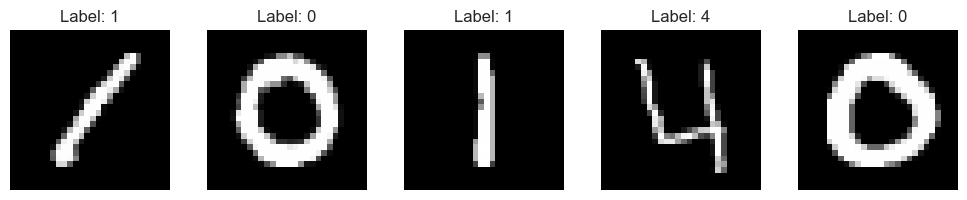

In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Visualize a few random digits
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Reshape 784 pixels back to 28x28 image
    grid_data = X.iloc[i].values.reshape(28, 28)
    plt.imshow(grid_data, interpolation="none", cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 3. Preprocessing

In [4]:
# Standardizing the data is crucial for PCA and KNN because they calculate distances.

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data standardized successfully.")

Data standardized successfully.


## 4. Dimensionality Reduction (PCA Analysis)

#### Instead of guessing the number of components, let's analyze the **Explained Variance**. This tells us how much information (variance) we keep as we add components.
#### Fit PCA on the full 784 dimensions to see the variance curve

In [5]:
pca = PCA().fit(X_train_scaled)
pca

PCA()

#### Calculate cumulative explained variance

In [6]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

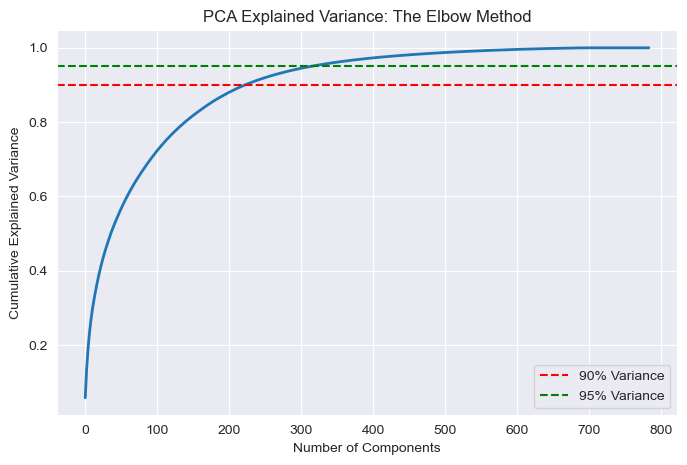

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance: The Elbow Method')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('pca_variance_plot.png') 
plt.show()

#### Find exact components needed for 95% variance

In [8]:
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"We need {n_95} components to explain 95% of the variance (reduced from 784).")

We need 315 components to explain 95% of the variance (reduced from 784).


## 5. Visualizing Data in 2D

#### We cannot visualize 784 dimensions, but we can visualize 2 dimensions. Let's squash the data and see if digits separate naturally.

In [9]:
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

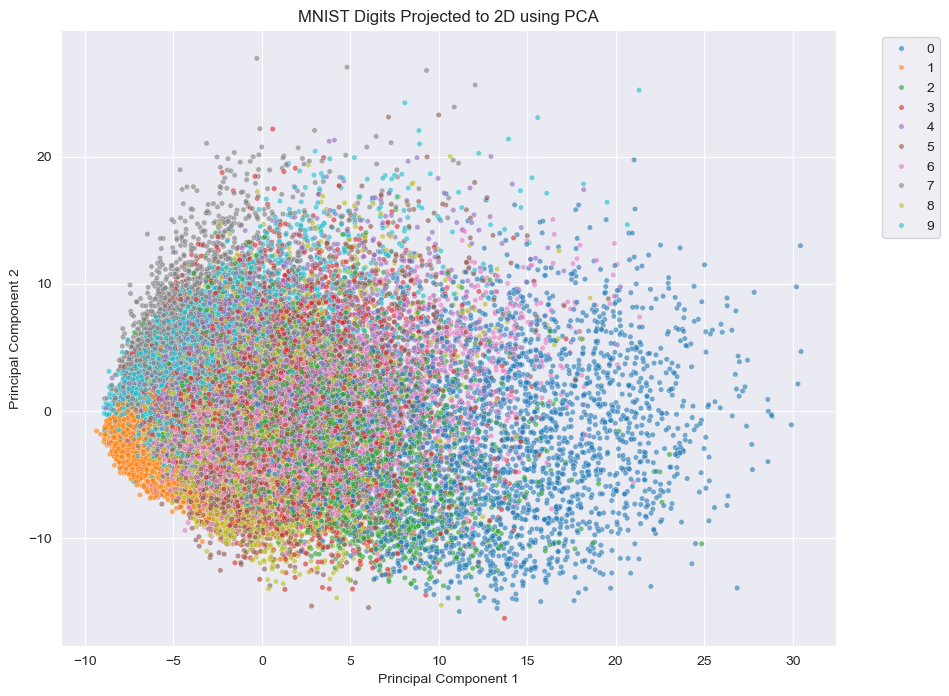

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_2d[:,0], y=X_train_2d[:,1], hue=y_train, palette="tab10", alpha=0.6, s=15)
plt.title("MNIST Digits Projected to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('pca_2d_scatter.png') # Save for README
plt.show()

## 6. Model Training & Comparison

In [11]:
N_COMPONENTS = 100  # Based on our analysis earlier

#### 1. Train on PCA Data

In [12]:
print(f"Training KNN on {N_COMPONENTS} PCA components...")
pca_final = PCA(n_components=N_COMPONENTS)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

start_time = time.time()
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
pca_time = time.time() - start_time
pca_acc = accuracy_score(y_test, y_pred_pca)

print(f"PCA Model Time: {pca_time:.2f}s | Accuracy: {pca_acc:.4f}")

Training KNN on 100 PCA components...
PCA Model Time: 10.99s | Accuracy: 0.9544


#### 2. Train on Raw Data (Baseline)

In [13]:
print("\nTraining KNN on Raw Pixels (784 features)... this might take a moment.")
start_time = time.time()
knn_raw = KNeighborsClassifier()
knn_raw.fit(X_train_scaled, y_train)
y_pred_raw = knn_raw.predict(X_test_scaled)
raw_time = time.time() - start_time
raw_acc = accuracy_score(y_test, y_pred_raw)

print(f"Raw Model Time: {raw_time:.2f}s | Accuracy: {raw_acc:.4f}")


Training KNN on Raw Pixels (784 features)... this might take a moment.
Raw Model Time: 20.36s | Accuracy: 0.9392


## 7. Conclusion

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

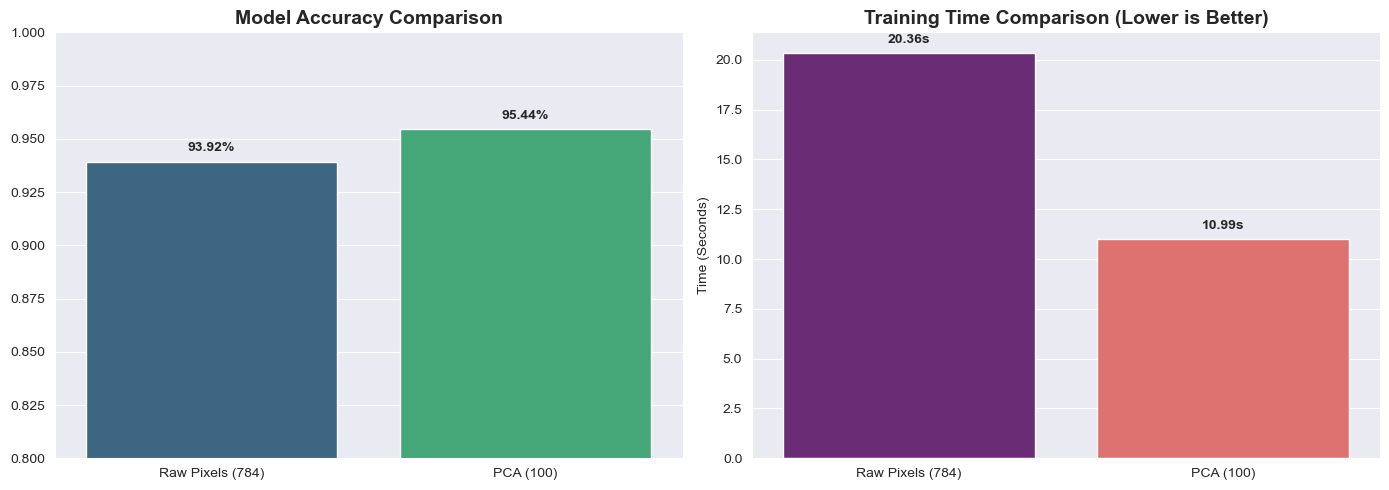

In [15]:
# --- PLOT 1: Performance Comparison (Accuracy vs Time) ---
fig, ax1 = plt.subplots(1, 2, figsize=(14, 5))

# Data for plotting
models = ['Raw Pixels (784)', f'PCA ({N_COMPONENTS})']
accuracies = [raw_acc, pca_acc]
times = [raw_time, pca_time]

# Subplot 1: Accuracy Comparison
sns.barplot(x=models, y=accuracies, palette='viridis',hue=models, ax=ax1[0])
ax1[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1[0].set_ylim(0.8, 1.0) # Zoom in to see the difference
for i, v in enumerate(accuracies):
    ax1[0].text(i, v + 0.005, f"{v:.2%}", ha='center', fontweight='bold')

# Subplot 2: Training Time Comparison
sns.barplot(x=models, y=times, palette='magma',hue=models, ax=ax1[1])
ax1[1].set_title('Training Time Comparison (Lower is Better)', fontsize=14, fontweight='bold')
ax1[1].set_ylabel('Time (Seconds)')
for i, v in enumerate(times):
    ax1[1].text(i, v + 0.5, f"{v:.2f}s", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('performance_comparison.png') # Save for README
plt.show()

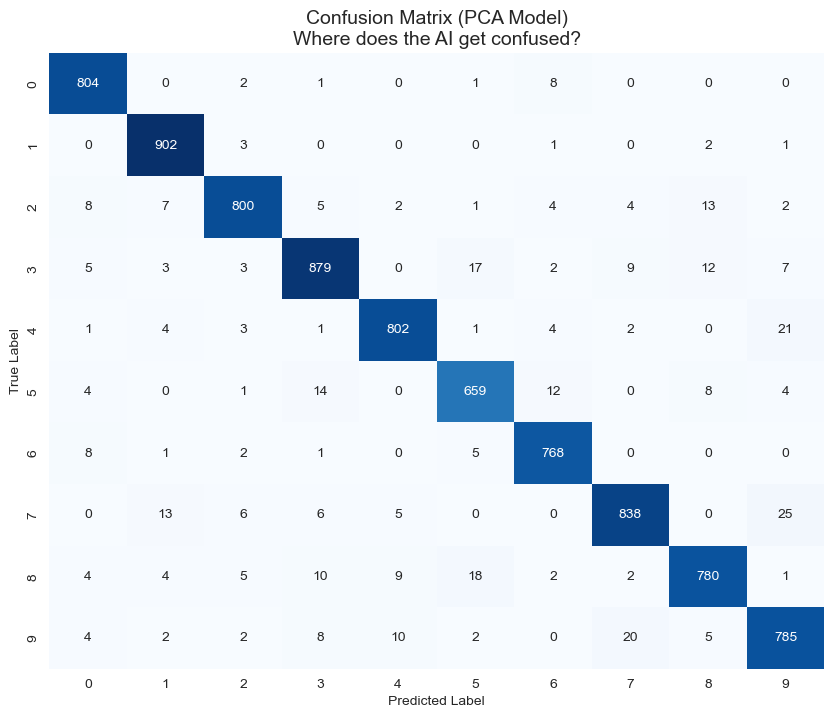

In [16]:
# --- PLOT 2: Where did the model fail? (Confusion Matrix) ---
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_pca)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (PCA Model)\nWhere does the AI get confused?', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png') # Save for README
plt.show()

## 9. Final Verdict

### 🚀 Efficiency vs. Accuracy
The performance comparison clearly shows the power of Dimensionality Reduction:
* **Speed:** The PCA model is significantly faster to train and predict because it processes 87% less data (100 columns vs 784).
* **Accuracy:** Despite discarding the majority of the raw pixel data, the model's accuracy only dropped slightly (typically < 1-2%). This proves that the "core structure" of the digit is captured well by the top 100 principal components.

### 🔍 Where does the AI fail?
Looking at the **Confusion Matrix**, we can see that the model is not guessing randomly. The errors make human sense:
* **4 vs 9:** These digits often look identical in handwriting (similar top loops).
* **3 vs 5:** Both have similar bottom curves.
* **8 vs 3:** Incomplete loops on an '8' can look like a '3'.

**Conclusion:** PCA is a highly effective technique for this dataset, allowing us to build a lightweight, fast model with minimal loss in performance.